# CSE474/574 - Programming Assignment 1

For grading, we will execute the submitted notebook as follows:

```shell
jupyter nbconvert --to python PA1Script.ipynb
python PA1Script.py
```

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [2]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [3]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    # Formula w=(X'X)^-1 (X'y)
    
    X_transpose = X.transpose()
    w=((np.linalg.inv(X_transpose.dot(X))).dot(X_transpose.dot(y)))
    
    #w=np.dot(np.linalg.inv(np.dot(X_transpose,(X))),(np.dot(X_transpose,(y))))

    return w

In [4]:
import math
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value
    
    a=Xtest.shape #to get the N value
    t=np.subtract(ytest,(Xtest.dot(w)))
    q=t.transpose()
    rmse=math.sqrt((1/a[0])*((q).dot(t)))
    
    return rmse

In [5]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [6]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [7]:
count=0

In [8]:
count=0
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #formula-J(w) = 1/2((y − Xw)' (y − Xw))
    w=w.reshape(X.shape[1],1)
    t = (y-(X.dot(w))) #(y − Xw)
    q = t.transpose() #(y − Xw)'
    
    error = ((1/2)*(q.dot(t))) #J(w) = 1/2((y − Xw)' (y − Xw))
    
    #print(error.shape)
    
    #print(error[0,0])
    return error.item()

In [9]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d 
    # y = N x 1
    # X'= d x N
    # Xw = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 
    #∇J(w) = X'Xw − X'y
    X_transpose = X.transpose()
    w=w.reshape(X.shape[1],1)
    error_grad=((X_transpose.dot(X).dot(w))-(X_transpose.dot(y)))
#     X_dot_w=X.dot(w);
#     X_dot_w=X_dot_w-y;
#     error_grad=X_transpose.dot(X_dot_w);
    
#     for ele in range(0,len(error_grad[0])):
#         ls_error.append(error_grad[0,ele])
    
    #error_grad=np.asarray(error_grad).reshape(-1)
    
    #return np.array(ls_error)
    
    
#     a = np.ones((X.shape[1],))
#     for i in range(X.shape[1]):
#         a[i]=error_grad[i]
   
   
 #     print(X.shape[1])
#     print(X.shape[0])
#     print(type(w))
#     print(error_grad.shape)
    
    error_grad=error_grad.reshape(X.shape[1],)
#     print(error_grad.shape)


    
    return error_grad


In [10]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 48.20
Gradient Descent Linear Regression RMSE on test data - 54.67


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [11]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [12]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions
    
#     w=w.reshape(X.shape[1],1)
#     w_t=w.transpose()
#     y=Xtest.dot(w)
#     ypred = np.zeros([Xtest.shape[0],1])
#     for i in range(Xtest.shape[0]):
        
#         if y[i]>=0:
#             y[i]=1
#         else:
#             y[i]=-1
            
    
#     #Xtrain[0].reshape(64,1)
#     ypred=regressionObjVal(w, Xtest,y)

    w=w.reshape(Xtest.shape[1],1)
#     w_t=w.transpose()
#     y=Xtest.dot(w)
#     ypred = np.zeros([Xtest.shape[0],1])
#     for i in range(Xtest.shape[0]):
        
#         if y[i]>=0:
#             ypred[i]=regressionObjVal(w, Xtest,1)
#         else:
#             ypred[i]=regressionObjVal(w, Xtest,-1)
# #     ypred=regressionObjVal(w, Xtest,y)
#     print(ypred.shape)

    
    y=np.dot(Xtest,w)
    ypred = np.zeros([Xtest.shape[0],1])
    for i in range(Xtest.shape[0]):
        
        if y[i]>=0:
            ypred[i]=1
        else:
            ypred[i]=-1

    
    
    return ypred

In [124]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values
    acc=0
    ypred=predictLinearModel(w,Xtest);
    acc=0
    for i in range(ytest.shape[0]):
        if (ypred[i]==ytest[i]):
            acc=acc+1
            
    acc=acc/ytest.shape[0]
    

   
    

    
    #print(acc)
    return acc

In [125]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
pw=w
w_Perceptron=w
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 0.84
Perceptron Accuracy on test data - 0.84


### Problem 4 - Logistic Regression Using Newton's Method

In [15]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [16]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
#     if len(w.shape) == 1:
#         w = w[:,np.newaxis]
        
#     sh=X.shape    
#     w=w.transpose()
#     a=0
#     w1=0
    
#     for i in range(len(X)):
#         a=a+math.log(1+math.exp(-y[i]*(w).dot(X[i])))
#     error=(1/sh[0])*a
# #     print(sh[1])
    
# #     print(w.dot(X[1]))
# #     print(w)
# #     for i in range(len(X)):
# #         w1=0
# #         for j in range(sh[1]):
# #             w1=w1+((0*(X[i][j])))
        
# #         a=a+math.log(1+math.exp(-y[i]*w1))
# #     print(a)    
# #     error=(1/sh[0])*a
#     print(error)      

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    else:
        w=w.reshape(X.shape[1],1)
#     print(y)
    error=0
    w_t=w.transpose()
    for i in range(X.shape[0]):
        error=error+math.log(1+ math.exp(-y[i]*(X[i]).dot(w)))
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error=error/X.shape[0]
    #print(error)
    

    return error



In [17]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    else:
        w=w.reshape(X.shape[1],1)
    
#     print(w.shape)
#     print(X.shape)
#     print(y.shape)
    a = np.zeros([X.shape[1],])
    w=w.transpose()
    
    
    
    for i in range(len(X)):
        a=a+((y[i]/(1+math.exp(y[i]*((w).dot(X[i])))))*(X[i]))
    
    gradient=-(1/len(X))*a
    #print(gradient)
    return gradient

In [126]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
        
    else:
        w=w.reshape(X.shape[1],1)
    
    
    hessian = np.zeros([w.shape[0],w.shape[0]])
    w=w.transpose()
    
    X_transpose=X.transpose()
    xx=(X.dot(X_transpose))
    xx=xx.flatten()
    #xx=xx.reshape((X.shape[1],(X.shape[1])))
                   
    for i in range(len(X)):
        hessian=hessian+((math.exp(y[i]*((w).dot(X[i]))))/(math.pow((1+math.exp(y[i]*((w).dot(X[i])))),2)))*(xx[i])
        
        
    hessian=(1/len(X))*hessian
    #print(hessian.shape)
#     hessian=np.zeros([X.shape[1],X.shape[1]])
#     hessian = np.eye(X.shape[1])
    #print(hessian)
    return hessian

In [127]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
lw=w
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 0.84
Logistic Regression Accuracy on test data - 0.86


### Problem 5 - Support Vector Machines Using Gradient Descent

In [20]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [128]:
import random
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    w=np.zeros([X.shape[1],1])
    import random 
    for a in range(T):
        i = random.choice(range(0,X.shape[0]-1))
        temp1=X[i].reshape([1,X.shape[1]])
        temp=np.dot(temp1,w)
        temp=temp.item()
        temp=y[i].item()*temp
        if(temp<1):

            term=(np.dot(y[i],temp1))
            term=term.reshape([X.shape[1],1])
            w=w+(eta*term)
    w=w.reshape([X.shape[1],1])

    


    
    

 
    return w

In [129]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 0.84
SVM Accuracy on test data - 0.86


### Problem 6 - Plotting decision boundaries

In [99]:
print('Problem 6')
print('---------')

Problem 6
---------


In [103]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5,1,'SVM')

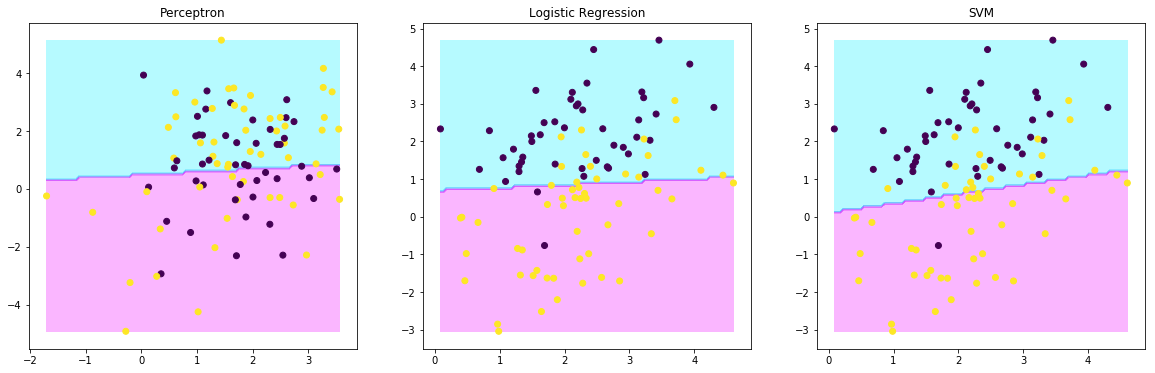

In [105]:
# Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb'))
# # add intercept
# Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
# Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
# # Replace next three lines with code for learning w using the three methods
# # PLUS,if needed, you can add at most extra 2 lines for each model.
# # w_perceptron = np.zeros((Xtrain_i.shape[1],1))
# w_perceptron=w_Perceptron
# # w_logistic = np.zeros((Xtrain_i.shape[1],1))
# # w_svm = np.zeros((Xtrain_i.shape[1],1))
# w_svm = trainSGDSVM(Xtest_i,ytest,250,eta=0.01)
# args = (Xtest_i,ytest)
# opts = {'maxiter' : 50} 
# # Preferred value.    
# w_init = np.zeros((Xtest_i.shape[1],1))
# soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
# w = np.transpose(np.array(soln.x))
# w = w[:,np.newaxis]
# w_Perceptron=w
# args = (Xtest_i,ytest)
# opts = {'maxiter' : 50}
# # Preferred value
# w_init = np.zeros((Xtest_i.shape[1],1))
# soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
# w = np.transpose(np.array(soln.x))
# w = np.reshape(w,[len(w),1])
# w_logistic=w

# fig = plt.figure(figsize=(20,6))
# ax = plt.subplot(1,3,1)
# plotBoundaries(w_perceptron,Xtest_i,ytrain)
# ax.set_title('Perceptron')


# ax = plt.subplot(1,3,2)
# plotBoundaries(w_logistic,Xtrain_i,ytrain)
# ax.set_title('Logistic Regression')

# ax = plt.subplot(1,3,3)
# plotBoundaries(w_svm,Xtrain_i,ytrain)
# ax.set_title('SVM')



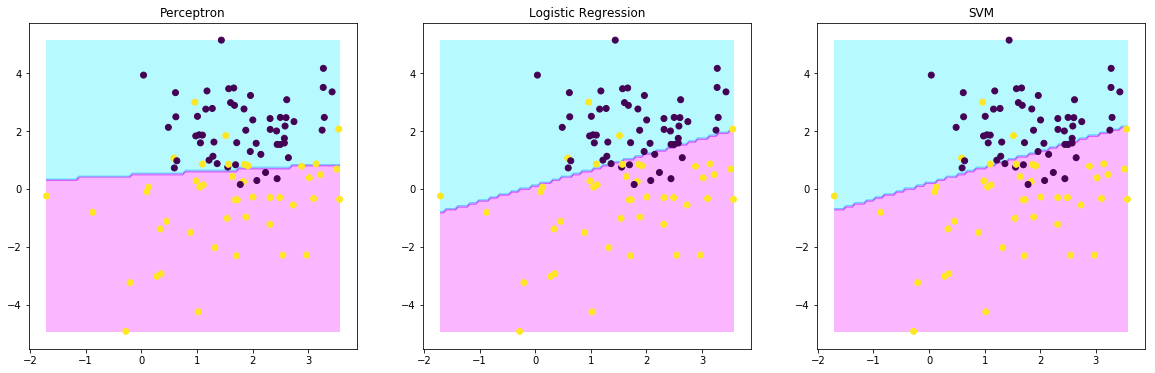

In [108]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb'))
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
# Replace next three lines with code for learning w using the three methods
# PLUS,if needed, you can add at most extra 2 lines for each model.
# w_perceptron = np.zeros((Xtrain_i.shape[1],1))

# w_logistic = np.zeros((Xtrain_i.shape[1],1))
# w_svm = np.zeros((Xtrain_i.shape[1],1))
w_svm = trainSGDSVM(Xtrain_i,ytrain,250,eta=0.01)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50} 
# Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
w_Perceptron=w
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}
# Preferred value
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
w_logistic=w

fig = plt.figure(figsize=(20,6))
ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtest_i,ytest)
ax.set_title('Perceptron')


ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtest_i,ytest)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtest_i,ytest)
ax.set_title('SVM')

plt.savefig('P16.png',dpi=300,bbox_inches='tight')